In [1]:
import os 
import matplotlib.pyplot as plt
import numpy as np
import h5py 
import matplotlib.pyplot as plt
import pyedflib
import pandas as pd
import h5py
import sys


sys.path.append(os.path.abspath(os.pardir))
from Dataset import MaskedDataset2
from deap_data import get_data_subject, filter_data_channels, divide_signal

Analyze the data. View the characteristics: the frequency, the number of data per class.

# Load the UVA dataset

In [2]:
data_hf5 = os.path.join(os.getcwd(), 'UVA-DATASET', 'archive', 'GIB-UVA ERP-BCI.hdf5')

In [3]:
data_hf5 = h5py.File(data_hf5, 'r')
features = np.array(data_hf5.get('features'))
labels = np.array(data_hf5.get('erp_labels'))
data_hf5.close()
print(features.shape)
print(labels.shape)


(701615, 128, 8)
(701615,)


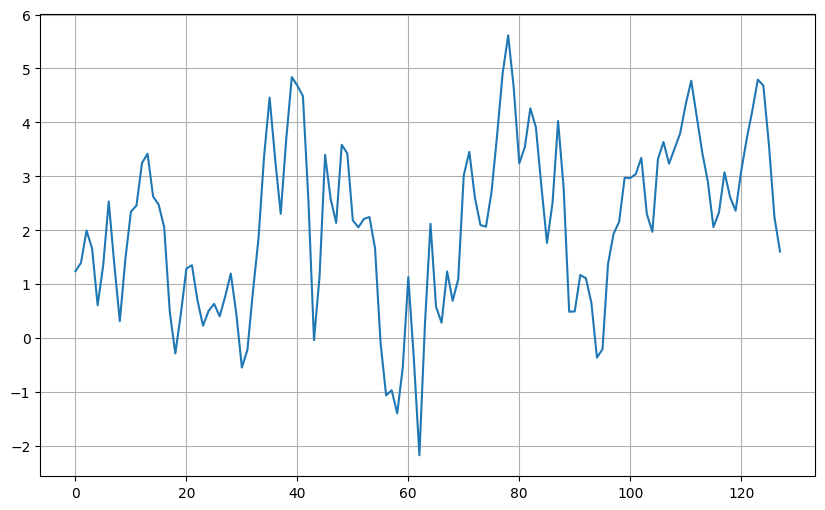

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(features[0,:,0])
plt.grid()
plt.show()

In [5]:
data_folder = os.path.join(os.pardir, 'data')
mask_data = os.path.join(data_folder, 'UVA-mask.h5')
deap_masked_dataset = MaskedDataset2(mask_data)

Load the UVA dataset used for the pretrained task

In [6]:
%matplotlib widget
from ipywidgets import interact, IntSlider


@interact(i=IntSlider(min=0, max=7, step=1, value=0), j=IntSlider(min=0, max=99, step=1, value=0), continuous_update=False)
def plote(i, j):
    sample_uva = deap_masked_dataset[j]
    sample_uva_masked = sample_uva[0].unsqueeze(0)
    sample_uva_raw = sample_uva[1].unsqueeze(0)
    sample_uva_mask = sample_uva[2].unsqueeze(0)

    # Define x, assuming 128 data points for each sample
    x = np.linspace(0, 127,128)

    plt.figure(figsize=(10, 6))  # Create a new figure for each plot

    # Plot the raw data
    plt.plot(x, sample_uva_raw[0,:,i].cpu().detach().numpy(), label='Raw EEG')
    # # Plot the mask
    plt.plot(x, sample_uva_mask[0,:,i].cpu().detach().numpy(), label='Mask')
    plt.plot(x, sample_uva_masked[0,:,i].cpu().detach().numpy(), label='Masked EEG')
    # Plot the prediction

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.title(f'EEG Data Visualization for Channel {i+1} and Sample {j}')
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=7), IntSlider(value=0, description='j', max=99),…

In [7]:
%matplotlib widget
from ipywidgets import interact, IntSlider


@interact(i=IntSlider(min=0, max=7, step=1, value=0), j=IntSlider(min=0, max=99, step=1, value=0), continuous_update=False)
def plote(i, j):
    sample_uva = deap_masked_dataset[j]
    sample_uva_masked = sample_uva[0].unsqueeze(0)
    sample_uva_raw = sample_uva[1].unsqueeze(0)
    sample_uva_mask = sample_uva[2].unsqueeze(0)

    # Define x, assuming 128 data points for each sample
    x = np.linspace(0, 127,128)

    plt.figure(figsize=(10, 6))  # Create a new figure for each plot

    # Plot the raw data
    plt.plot(x, sample_uva_raw[0,:,i].cpu().detach().numpy(), label='Raw EEG')
    # # Plot the mask
    # plt.plot(x, sample_uva_mask[0,:,i].cpu().detach().numpy(), label='Mask')
    plt.plot(x, sample_uva_masked[0,:,i].cpu().detach().numpy(), label='Masked EEG')
    # Plot the prediction

    plt.legend()
    plt.grid(True)
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.title(f'EEG Data Visualization for Channel {i+1} and Sample {j}')
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=7), IntSlider(value=0, description='j', max=99),…

Count the number of data per class

In [8]:
unique, counts = np.unique(labels, return_counts=True)
print(dict(zip(unique, counts)))

{0.0: 576855, 1.0: 124760}


In [9]:
print(counts[0]/ labels.shape[0])

0.8221816808363561


# Load the DEAP dataset

In [10]:
subject_data = get_data_subject(subject =1)
# Get the information of the data an labels
data = subject_data['data']
labels = subject_data['labels']
print(data.shape)
print(labels.shape)

(40, 40, 8064)
(40, 4)


The data information. The data is of the shape (trial, channel, time_points). The time points corresponds to 63s (fs = 128Hz). 
The label (trial, label). The label is define in terms of valence, arousal, dominance and liking.

In [11]:
channels_interest = ['FZ', 'CZ', 'PZ', 'OZ', 'P3', 'P4', 'O1', 'O2']
channels = [19,24,16,11,29,13,31,15]

We plot the data

In [12]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider

@interact(i=IntSlider(min=0, max=7, step=1, value=0), j=IntSlider(min=1, max=32, step=1, value=0), trial = IntSlider(min = 0, max = 39, value = 0), continuous_update=False)
def plote(i, j, trial):
    data = get_data_subject(subject = j)
    data = data['data'][:,:,:7680]
    print(data.shape)
    filtered_data = filter_data_channels(data, channels)
    sample = divide_signal(filtered_data, 512)
    sample = sample[trial]
    x = np.linspace(0, 511, 512)

    plt.figure(figsize=(10, 6))  # Create a new figure for each plot
    # Plot the raw data
    plt.plot(x, sample[i], label='Raw Data')
    plt.legend()
    plt.grid(True)
    plt.xlabel('Time Step')
    plt.ylabel('Amplitude')
    plt.title(f'EEG Data Visualization for Channel {i+1} and Sample {j}')
    plt.show()


interactive(children=(IntSlider(value=0, description='i', max=7), IntSlider(value=1, description='j', max=32, …

# Load the TUEH data 

In [13]:
file = os.path.join(os.getcwd(), 'TUEH/001/001/aaaaaahq/s002_2010/01_tcp_ar/aaaaaahq_s002_t000.edf')
print(file)
# Load the data
f = pyedflib.EdfReader(file)
# plot the data
n = f.signals_in_file

# Get and print the signal labels (channel names)
signal_labels = f.getSignalLabels()
print("Signal Labels (Channel Names):", signal_labels)

# Read the signals into buffers
sigbufs = [f.readSignal(i) for i in range(n)]
print(sigbufs[0].shape)
# Print the number of signals and the shape of the first signal (if available)
print("Number of Signals:", len(sigbufs))
if len(sigbufs) > 0:
    print("Shape of the First Signal Data:", sigbufs[0].shape)

# Get and print the sampling frequencies of all signals
sampling_frequencies = [f.getSampleFrequency(i) for i in range(n)]
print("Sampling Frequencies:", sampling_frequencies)

# Always close the file when done
f._close()

channels = ['EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']


/home/brgonzalez/Escritorio/EEG_CHANEL/data/TUEH/001/001/aaaaaahq/s002_2010/01_tcp_ar/aaaaaahq_s002_t000.edf
Signal Labels (Channel Names): ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG 26-REF', 'EEG 27-REF', 'EEG 28-REF', 'EEG 29-REF', 'EEG 30-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']
(310500,)
Number of Signals: 36
Shape of the First Signal Data: (310500,)
Sampling Frequencies: [250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 250.0, 1.0, 1.0, 1.0]


In [14]:
parent_dir = os.path.join(os.pardir)
data_folder = os.path.join(parent_dir, 'preprocess_data')
data_path = os.path.join(data_folder, 'signals_001_128_4s.csv')

In [15]:
data = pd.read_csv(data_path, nrows = 1000) 
data = data.to_numpy()
data = data.reshape(8,-1, 512) 

Analyze the signal

Text(0.5, 1.0, 'EEG Data Visualization for Channel 1')

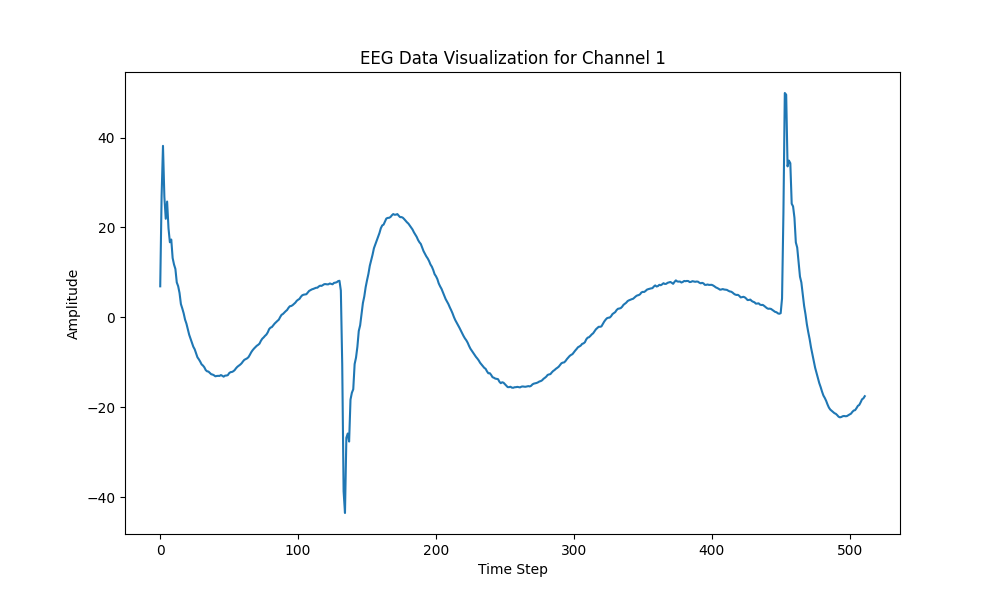

In [16]:
# Plot the data 4s
plt.figure(figsize=(10, 6))
plt.plot(data[0,0,:])
plt.xlabel('Time Step')
plt.ylabel('Amplitude')
plt.title('EEG Data Visualization for Channel 1')

In [20]:
mask_data = os.path.join(os.getcwd(), 'TUEH-mask.h5')
deap_masked_dataset = MaskedDataset2(mask_data, normalize='normalization')

interactive(children=(IntSlider(value=0, description='i', max=7), IntSlider(value=0, description='j', max=99),…

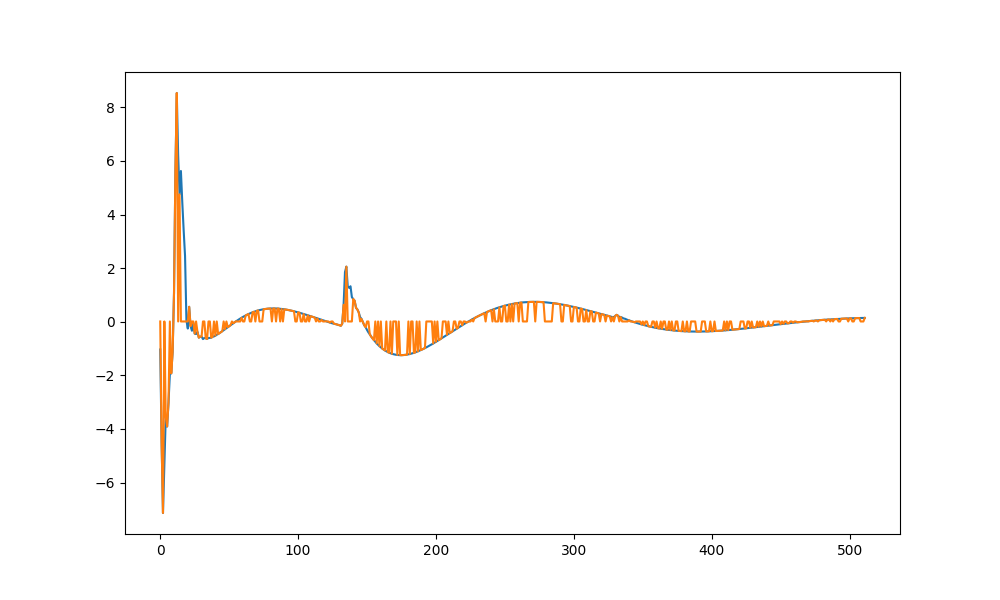

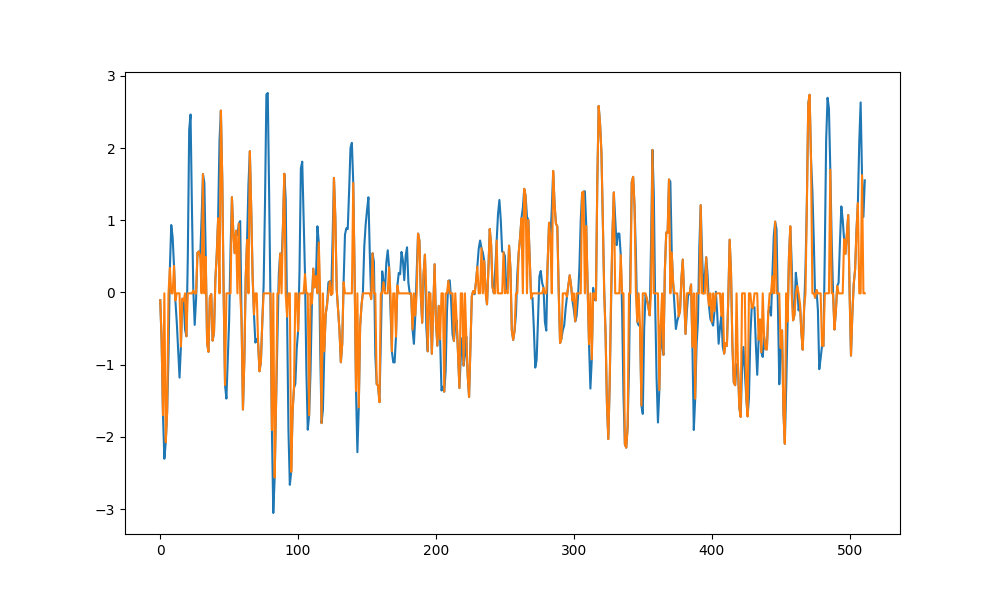

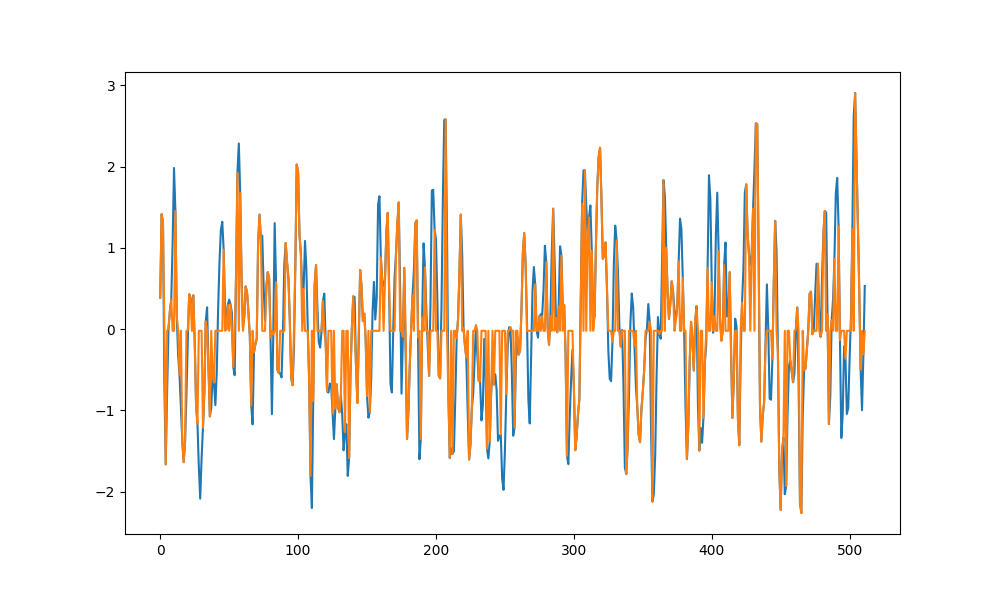

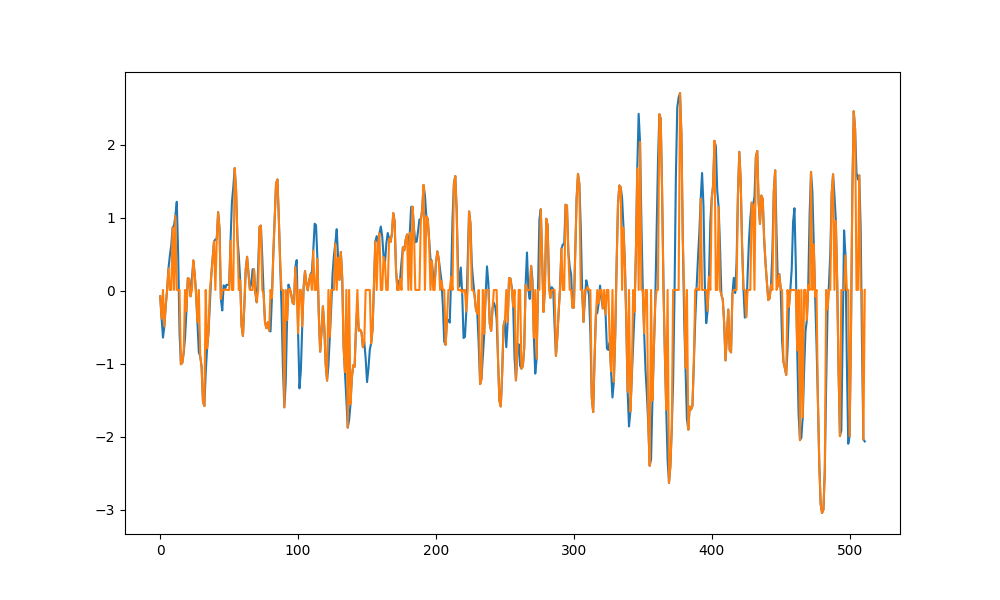

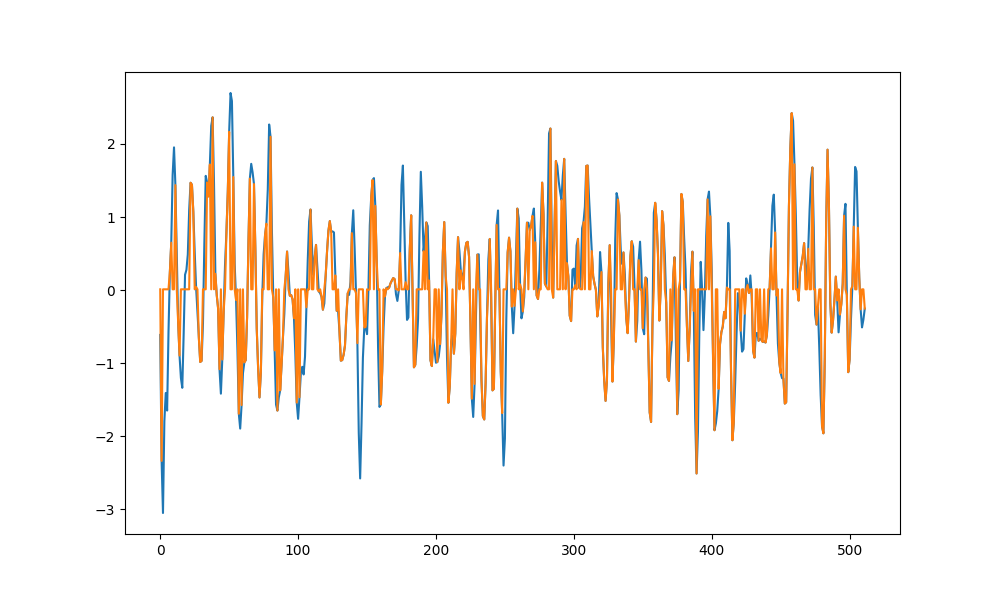

In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider


@interact(i=IntSlider(min=0, max=7, step=1, value=0), j=IntSlider(min=0, max=99, step=1, value=0), continuous_update=False)
def plote(i, j):
    sample_uva = deap_masked_dataset[j]
    sample_uva_masked = sample_uva[0].unsqueeze(0)
    sample_uva_raw = sample_uva[1].unsqueeze(0)
    sample_uva_mask = sample_uva[2].unsqueeze(0)

    # Define x, assuming 128 data points for each sample
    x = np.linspace(0, 511,512)

    plt.figure(figsize=(10, 6))  # Create a new figure for each plot
    print(sample_uva_masked.shape)
    # # Plot the raw data
    plt.plot(x, sample_uva_raw[0,:,i].cpu().detach().numpy(), label='Raw EEG')
    # # Plot the mask
    # plt.plot(x, sample_uva_mask[0,:,i].cpu().detach().numpy(), label='Mask')
    plt.plot(x, sample_uva_masked[0,:,i].cpu().detach().numpy(), label='Masked EEG')
    # # Plot the prediction

    # plt.legend()
    # plt.grid(True)
    # plt.xlabel('Time Step')
    # plt.ylabel('Amplitude')
    # plt.title(f'EEG Data Visualization for Channel {i+1} and Sample {j}')
    # plt.show()